This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will:

- Learn how to generate random variables (discrete or continuous) following different distributions.
- Learn how to represent random variables and distributions
- Calculate main statistics of the generated random variables
- Solve specific problems associated with different distributions

For doing this, we will used the library [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) which allows us to generate random variables following diferent distributions.

# 0. Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import binom, poisson, norm

# 1. Binomial distribution

- To generate $N$ Binomial(n,p) r.v.'s we write `binom_rvs = binom.rvs(n,p,size = N)` 
- To generate a Binomial(n,p) pmf we write `binom_pmf = binom(n,p).pmf(x)`

All methods associated with the Binomial distribution can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

Run the following examples, and try to understand the code and the results. Then, solve the proposed exercises.

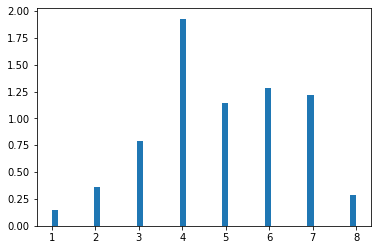

In [4]:
# Example 1: plot the histogram of 100 Binomial(10,0.5) r.v.s
# Change the values of size and bins parameters and see what happens
n = 10
p = 0.5
binom_rvs = binom.rvs(n,p,size = 100)

plt.hist(binom_rvs, density=True, bins=50)
plt.show()

0
1
2
3
4
5
6
7
8
9


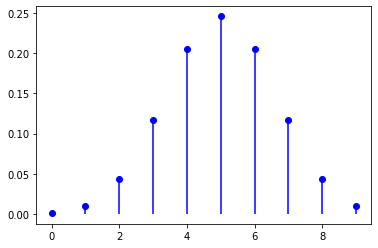

In [5]:
# Example 2: plot the pmf of a Binomial(10,0.5) 
x = range(0,10)
for i in x:
    print(i)
    
plt.plot(x,binom(10,0.5).pmf(x),'bo')
plt.vlines(x,0,binom(10,0.5).pmf(x),'b')
plt.show()

In [5]:
# Example 3: calculate the mean, std and median values of a Binomial(10,0.5)
print('mean:',binom(10,0.5).mean())
print('std:',binom(10,0.5).std())
print('median:',binom(10,0.5).median())

mean: 5.0
std: 1.5811388300841898
median: 5.0


## Exercise 1

<div class="alert alert-block alert-info">
The prevalence of bronchitis within the polulation is 5%. <br>
- What is the probability that there are 75 bronchitis patients among 1500 subjects? <br>
- What is the probability that there are more than 75 bronchitis patients among 1500 subjects?
</div>



In [6]:
prob_br = 0.05 #Probability ob having bronchitis
n = 75 #Number of patients having it
s = 1500 #Number of total subjects

print('Probability of ex 1.a) is', binom(s,prob_br).pmf(n))

#For the second part we can use cdf or a loop with each pmf

print('Probability of ex 1.b) is', 1- binom(s,prob_br).cdf(n))



Probability of ex 1.a) is 0.0472099798479879
Probability of ex 1.b) is 0.4693315787403479


## Exercise 2 

<div class="alert alert-block alert-info">
Suppose a friend has 8 children, 7 of which are girls and none are twins. If each gender has an independent 50% probability for each birth, what’s the probability of getting 7 or more girls out of 8 births?
</div>

In [7]:
binom(8,0.5).pmf(7) + binom(8,0.5).pmf(8)

0.035156250000000014

# 2. Poisson distribution

The [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) distribution is defined by scipy as 

$$f(k) = \exp{(-\mu)}\frac{\mu^k}{k!},\,\textrm{ for } k \geq 0$$

which takes $\mu$ as a parameter

## Exercise 3

<div class="alert alert-block alert-info">
Suppose the number of deaths from typhoid fever over a 1-year period is Poisson distributed with a mean of $4.6$ per year. What is the probability distribution of the number of deaths over a 6-month period? A 3-month period? Represent the associated pmf. In which of these two cases  is it more likely that no one died? Justify your answer 
</div>

#### First

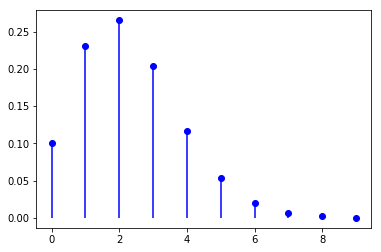

In [8]:
mu = 4.6 * 0.5 #half of a year
x = range(0,10)
plt.plot(x,poisson(mu).pmf(x),'bo')
plt.vlines(x,0,poisson(mu).pmf(x),'b')
plt.show()

#### Second

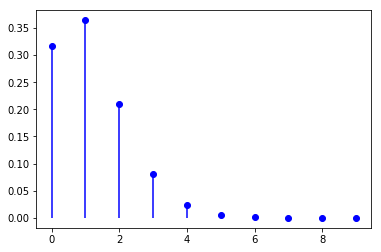

In [9]:
mu2= 4.6 * 0.25
x = range(0,10)
plt.plot(x,poisson(mu2).pmf(x),'bo')
plt.vlines(x,0,poisson(mu2).pmf(x),'b')
plt.show()

##### X axis is deaths

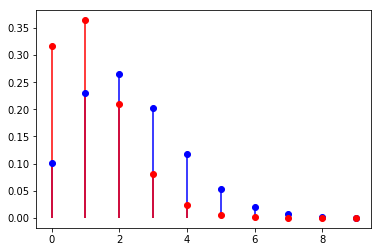

In [10]:
plt.plot(x,poisson(mu).pmf(x),'bo')
plt.vlines(x,0,poisson(mu).pmf(x),'b')

plt.plot(x,poisson(mu2).pmf(x),'ro')
plt.vlines(x,0,poisson(mu2).pmf(x),'r')
plt.show()

## Exercise 4: poisson approximation to the binomial

<div class="alert alert-block alert-info">
We flip a coin with success probability 0.01 five hundred times. What’s the probability of 2 or fewer successes? Answer the question using a poisson and a binomial distribution 
</div>

##### Binomial

In [2]:
p = 0.01
n = 500
binom(n,p).cdf(2)

0.12338577435354905

##### Poisson

In [3]:
poisson(n*p).cdf(2)  #mu = n* p

0.12465201948308108

# 3. Normal distribution

In scipy, the [normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) is defined in the standarized form

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

## Exercise 5

<div class="alert alert-block alert-info">
Write a python funtion for representing a normal distrution of mean $\mu$ and variance $\sigma^2$
</div>

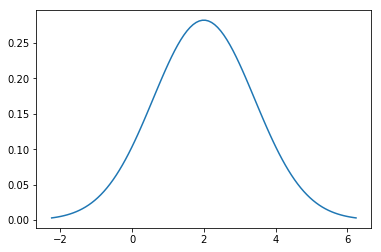

In [15]:
def plot_normal_pdf(mu,sigma2): #sigma2 = Var
    
    import scipy.stats as stats
    import math as m
    sigma = m.sqrt(sigma2)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    
    return plt.show()
 
plot_normal_pdf(2,2)

## Exercise 6

<div class="alert alert-block alert-info">
Suppose that the number of web hits to a particular site are approximately normally distributed with a mean of 100 hits per day and a standard deviation of 10 hits per day. What number of web hits per day represents the number so that only 5% of days have more hits?
</div>

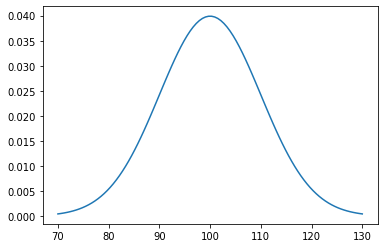

In [4]:
def plot_normal_pdf(mu,sigma2): 
    
    import scipy.stats as stats
    import math as m
    sigma = m.sqrt(sigma2)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    
    return plt.show()
 
plot_normal_pdf(100,100)

In [5]:
norm.ppf(0.95,100,10) # The point where reach 100-5%, with mean 100 and std 10

116.44853626951472

## Exercise 7 (optional)

We want to perform the following experiment:

1. Take 5 samples at random from a $N(2,4)$ distribution
2. Calculate the mean value of those 5 samples
3. Repeat steps 1 and 2, say a 100 times, and represent the histogram of the resulting mean value for each repetition 

<div class="alert alert-block alert-info">
What's the mean of the mean value for all repetitions?
</div>



In [18]:
#mean = 2, std = 4
a = np.random.normal(2,4,5)

In [19]:
a

array([ 0.05184951, -2.62951053,  5.16097591,  5.34533658,  0.22952608])

In [20]:
numbers = []
for i in a:
    numbers.append(i)

In [21]:
numbers

[0.05184951146092587,
 -2.629510526953921,
 5.160975910799181,
 5.345336583863068,
 0.22952608062592428]

2nd exercise

In [22]:
print(sum(numbers))
print('The mean is:',sum(numbers)/5 )

8.158177559795178
The mean is: 1.6316355119590356


3rd 

In [25]:
means = []
t = 0
while t < 100:
    means.append(sum(np.random.normal(2,4,5))/5)
    t = t+1

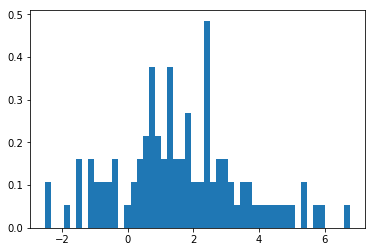

In [26]:
plt.hist(means, density=True, bins=50)
plt.show()